In [1]:
!pip install opencv-python

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
!pip install pytesseract

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [3]:
!pip install pdf2image

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [4]:
import cv2
import numpy as np
from pdf2image import convert_from_path
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract

In [15]:
# image = np.concatenate(tuple(convert_from_path('Invoice1.pdf')))
# image, image.shape
image = np.array(convert_from_path('Invoice1.pdf')[0])
image, image.shape

(array([[[255, 255, 255],
         [255, 255, 255],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
         [ 13, 131, 221],
         [ 13, 131, 221]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
         [ 13, 131, 221],
         [ 13, 131, 221]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
         [ 13, 131, 221],
         [ 13, 131, 221]],
 
        ...,
 
        [[255, 255, 255],
         [ 13, 131, 221],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
         [ 13, 131, 221],
         [ 13, 131, 221]],
 
        [[255, 255, 255],
         [ 13, 131, 221],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
         [ 13, 131, 221],
         [ 13, 131, 221]],
 
        [[255, 255, 255],
         [ 13, 131, 221],
         [ 13, 131, 221],
         ...,
         [ 13, 131, 221],
  

In [16]:
def display(im_data):
    dpi = 200

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

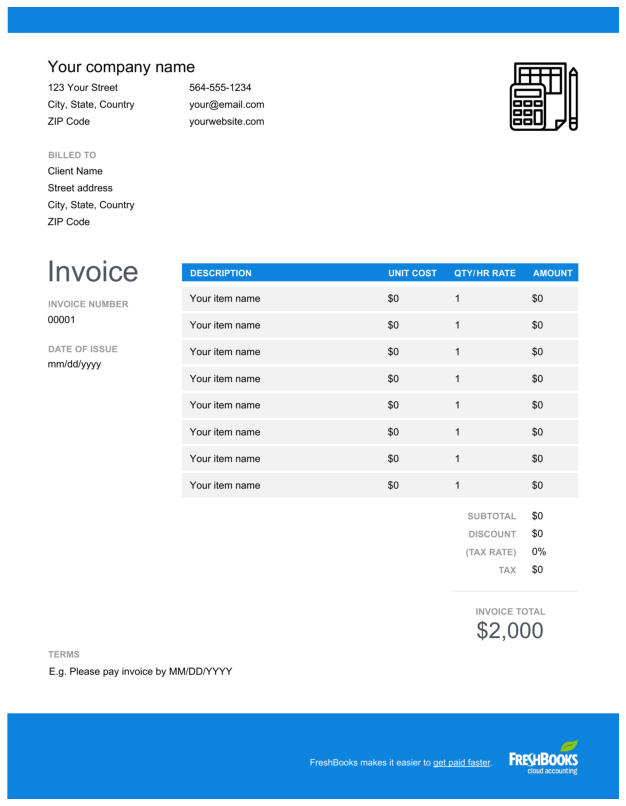

In [17]:
display(image)

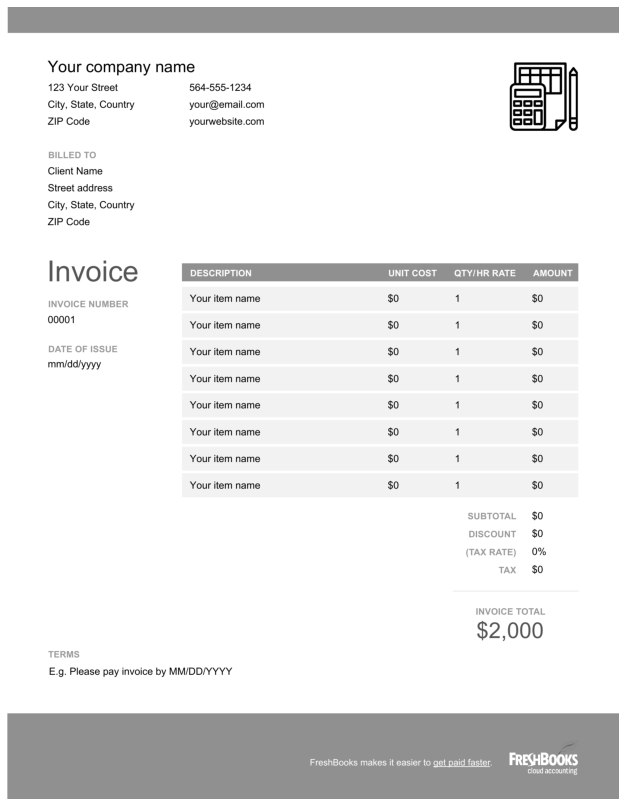

In [18]:
# Binarization
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = grayscale(image)
display(gray_image)

In [19]:
from pytesseract import Output
ocr_data = pytesseract.image_to_data(gray_image, output_type=Output.DICT)

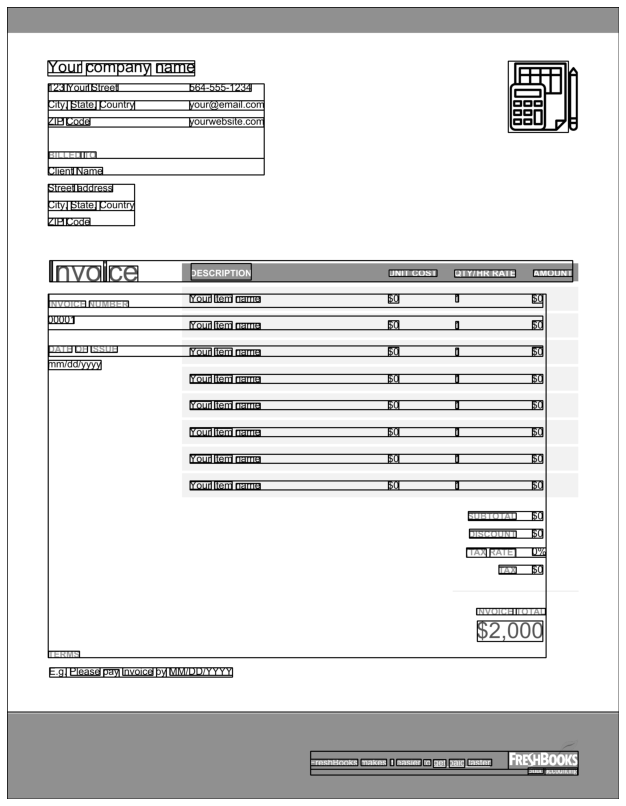

In [23]:
n_boxes = len(ocr_data['level'])
boxed_image = gray_image.copy()

for i in range(n_boxes):
    (x, y, w, h) = (ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i])    
    boxed_image = cv2.rectangle(boxed_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

display(boxed_image)

### extract text

In [24]:
ocr_result = pytesseract.image_to_string(gray_image) #line by line

In [25]:
print(ocr_result)

Your company name

123 Your Street 564-555-1234
City, State, Country your@email.com
ZIP Code yourwebsite.com
BILLED TO

Client Name

Street address
City, State, Country
ZIP Code

| nvo | ce DESCRIPTION UNITCOST QTY/HRRATE AMOUNT

INVOICE NUMBER Your item name $0 1 $0
00001 Your item name $0 1 $0
DATE OF ISSUE Your item name $0 4 $0
mm/dd/yyyy
Your item name $0 4 $0
Your item name $0 4 $0
Your item name $0 4 $0
Your item name $0 4 $0
Your item name $0 4 $0
SUBTOTAL $0
DISCOUNT $0
(TAX RATE) 0%
TAX $0
INVOICE TOTAL
$2,000
TERMS

E.g. Please pay invoice by MM/DD/YYYY

FreshBooks makes it easier to get paid faster. FRESHBOOKS
cloud accounting




### extract subtotal using re

In [41]:
lines = ocr_result.split('\n')
lines = [line.lower() for line in lines]
lines

['your company name',
 '',
 '123 your street 564-555-1234',
 'city, state, country your@email.com',
 'zip code yourwebsite.com',
 'billed to',
 '',
 'client name',
 '',
 'street address',
 'city, state, country',
 'zip code',
 '',
 '| nvo | ce description unitcost qty/hrrate amount',
 '',
 'invoice number your item name $0 1 $0',
 '00001 your item name $0 1 $0',
 'date of issue your item name $0 4 $0',
 'mm/dd/yyyy',
 'your item name $0 4 $0',
 'your item name $0 4 $0',
 'your item name $0 4 $0',
 'your item name $0 4 $0',
 'your item name $0 4 $0',
 'subtotal $0',
 'discount $0',
 '(tax rate) 0%',
 'tax $0',
 'invoice total',
 '$2,000',
 'terms',
 '',
 'e.g. please pay invoice by mm/dd/yyyy',
 '',
 'freshbooks makes it easier to get paid faster. freshbooks',
 'cloud accounting',
 '',
 '']

In [43]:
# import re
# amt_re = re.compile(r'$\d+')

In [62]:
for line in lines:   
    if 'subtotal' in line:
        sub = float(line.split(' ')[-1].replace('$',''))
sub

0.0

### extract table

In [106]:
import pandas as pd
dataset = pd.DataFrame(columns=['Item', 'Price'])

dataset

,Item,Price


In [107]:
for i, line in enumerate(lines):
    print(i,line)

0 your company name
1 
2 123 your street 564-555-1234
3 city, state, country your@email.com
4 zip code yourwebsite.com
5 billed to
6 
7 client name
8 
9 street address
10 city, state, country
11 zip code
12 
13 | nvo | ce description unitcost qty/hrrate amount
14 
15 invoice number your item name $0 1 $0
16 00001 your item name $0 1 $0
17 date of issue your item name $0 4 $0
18 mm/dd/yyyy
19 your item name $0 4 $0
20 your item name $0 4 $0
21 your item name $0 4 $0
22 your item name $0 4 $0
23 your item name $0 4 $0
24 subtotal $0
25 discount $0
26 (tax rate) 0%
27 tax $0
28 invoice total
29 $2,000
30 terms
31 
32 e.g. please pay invoice by mm/dd/yyyy
33 
34 freshbooks makes it easier to get paid faster. freshbooks
35 cloud accounting
36 
37 


In [108]:
for i, line in enumerate(lines):
    if i <= 14:
        continue
    
    if len(line.split(' ')) >= 4 and any(i.isdigit() for i in line):
        line = line.lstrip('0123456789.- ').replace('invoice number ','').replace('date of issue ','')
        line = line.split(' ')
        item_words = line[:-3]
        item = ' '.join(item_words)
        price = line[-1]
        dataset = dataset.append(pd.DataFrame([[item,price]],columns = dataset.columns))

In [109]:
dataset.reset_index(drop=True)

,Item,Price
0,your item name,$0
1,your item name,$0
2,your item name,$0
3,your item name,$0
4,your item name,$0
5,your item name,$0
6,your item name,$0
7,your item name,$0
